In [1]:
import sys

IN_COLAB = "google.colab" in sys.modules
IN_COLAB

False

In [2]:
if IN_COLAB:
    from google.colab import drive

    drive.mount("/content/drive")

In [3]:
if IN_COLAB:
    # Put here the full path to the folder having your Sprint project code
    # e.g. "/content/drive/MyDrive/assignment"
    ROOT_DIR = "/content/drive/MyDrive/'Colab Notebooks'/AnyoneAI/final_project/main"
    %cd $ROOT_DIR

In [4]:
pip install boto3 python_dotenv

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from scipy.stats import randint

from src import config, data_utils, evaluation, plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [6]:
dataset = pd.read_csv('clean_data.csv')

In [7]:
dataset.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,TARGET_LABEL_BAD=1,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS
0,1 - 14,Web,F,other,1,RN,Y,+ 1 year,1,N,...,1,26 - 35,1,True,True,[650 - 1320],True,False,False,False
1,15 - 30,Carga,F,married,0,RJ,Y,0 - 6 months,1,Y,...,1,26 - 35,1,False,True,[650 - 1320],False,False,False,False
2,1 - 14,Web,F,married,0,RN,Y,+ 1 year,1,N,...,1,26 - 35,0,False,True,[0 - 650],False,False,False,False
3,15 - 30,Web,F,married,0,PE,N,+ 1 year,1,N,...,1,> 60,0,False,False,[0 - 650],False,False,False,False
4,1 - 14,Web,M,married,0,RJ,Y,6 months - 1 year,1,N,...,1,46 - 60,1,False,True,[650 - 1320],False,False,False,False


In [8]:
dataset.describe()

,QUANT_DEPENDANTS,FLAG_EMAIL,PRODUCT,TARGET_LABEL_BAD=1
count,49935.000000,49935.000000,49935.000000,49935.000000
mean,0.593171,0.803104,1.275378,0.260699
std,0.966021,0.397657,0.987204,0.439020
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,7.000000,1.000000


In [76]:
# perform random downsampling
# sample_size = dataset['TARGET_LABEL_BAD=1'].value_counts().min()
# dataset_resampled = pd.concat([dataset[dataset['TARGET_LABEL_BAD=1'] == c].sample(sample_size) for c in dataset['TARGET_LABEL_BAD=1'].unique()])
# print('Resampled dataset shape %s' % dataset_resampled['TARGET_LABEL_BAD=1'].value_counts())

In [80]:
# first split in sets
app_train_set, app_val_set, app_test_set = data_utils.get_feature_in_set(dataset)

In [81]:
# second split features and target
train_prep, y_train, val_prep, y_val, test_prep, y_test = data_utils.get_feature_target(app_train_set,app_val_set,app_test_set)

In [82]:
# third apply preprocess in sets
X_train, X_val, X_test, columns = data_utils.preprocess_data(train_prep,val_prep,test_prep)

Input train data shape:  (35953, 20)
Input val data shape:  (3995, 20)
Input test data shape:  (9987, 20) 

cat_cols:  Index(['PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'MARITAL_STATUS',
       'RESIDENCIAL_STATE', 'FLAG_RESIDENCIAL_PHONE', 'MONTHS_IN_RESIDENCE',
       'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'AGE', 'HAS_DEPENDANTS',
       'HAS_RESIDENCE', 'MONTHLY_INCOMES_TOT', 'HAS_CARDS',
       'HAS_BANKING_ACCOUNTS', 'HAS_PERSONAL_ASSETS', 'HAS_CARS'],
      dtype='object')
['QUANT_DEPENDANTS', 'FLAG_EMAIL', 'PRODUCT']
Index(['PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'SEX',
       'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE',
       'HAS_DEPENDANTS', 'HAS_RESIDENCE', 'HAS_CARDS', 'HAS_BANKING_ACCOUNTS',
       'HAS_PERSONAL_ASSETS', 'HAS_CARS'],
      dtype='object')
Index(['MARITAL_STATUS', 'RESIDENCIAL_STATE', 'MONTHS_IN_RESIDENCE', 'AGE',
       'MONTHLY_INCOMES_TOT'],
      dtype='object')


In [119]:
model = RandomForestClassifier()

In [121]:
param_dist = {
    # "n_estimators": randint(100, 500),
    "max_depth": [None],
    # "max_features": randint(1, 11),
    # "min_samples_split": randint(2, 11),
    # "min_samples_leaf": randint(1, 11),
    # "bootstrap": [True, False],
    # "criterion": ["gini", "entropy"],
    "class_weight": ["balanced", "balanced_subsample"],
}

In [122]:
baseline_model = RandomizedSearchCV(model,param_dist,scoring='accuracy',n_iter=15)

In [123]:
baseline_model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/anyone/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=15. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None]},
                   scoring='accuracy')

In [124]:
y_hat = baseline_model.predict(X_test)

In [125]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      7337
           1       0.31      0.13      0.18      2650

    accuracy                           0.69      9987
   macro avg       0.53      0.51      0.50      9987
weighted avg       0.63      0.69      0.64      9987



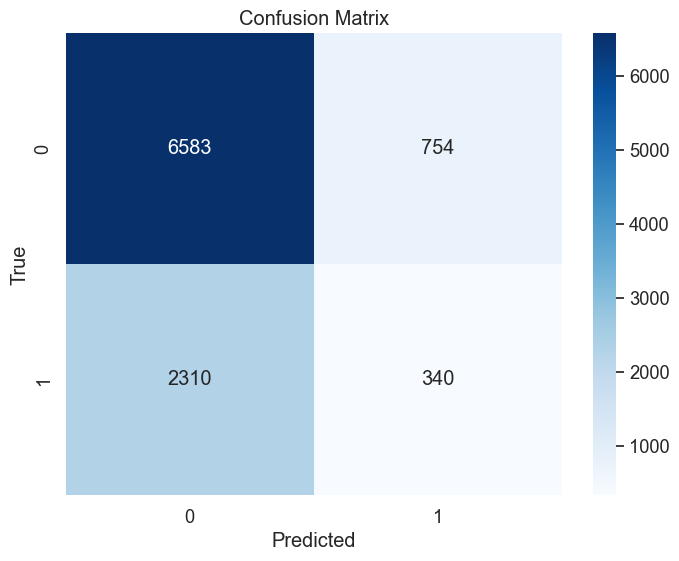

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming you have y_test and y_hat
# y_test: true labels
# y_hat: predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Get class labels
class_labels = unique_labels(y_test, y_hat)

# Create a figure and axis
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
# Best param_num_leaves:90, param_min_child_samples:20, param_max_depth:5, param_learning_rate:0.1

In [105]:
results = pd.DataFrame(baseline_model.cv_results_)
results.sort_values(by='rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.714383,0.004232,0.214214,0.001131,None,"{0: 1, 1: 3}","{'max_depth': None, 'class_weight': {0: 1, 1: 3}}",0.701850,0.705882,0.702267,0.709458,0.702921,0.704475,0.002863,1
0,3.228370,0.024408,0.217796,0.003380,None,balanced_subsample,"{'max_depth': None, 'class_weight': 'balanced_...",0.701850,0.704353,0.699207,0.708901,0.704033,0.703669,0.003200,2
1,2.760330,0.020716,0.214982,0.001734,None,balanced,"{'max_depth': None, 'class_weight': 'balanced'}",0.701432,0.702684,0.701015,0.705702,0.703199,0.702807,0.001652,3
